# **AM Consultancy Health Project 2023**

##**Story**

> AM is a consultancy firm that is appointed by the government to devise health policies to efficiently allocate the budget so that it is beneficial for the poor in the southern Punjab district, Rajanpur. For one of the policies on budget allocation for MRI machines, oxygen cylinders, and medicines required for the treatment of stroke and heart disease, they collected data from Rajanpur to assess how many people are suffering from stroke and what were the initial factors leading to it. They recorded BMI, average glucose level, hypertension, smoker or not, married or not, age, gender, residence type, work type if they ever suffered from heart disease or not, and if they had ever suffered from a stroke.

> Utilizing this data their task is to devise a model which can easily predict whether someone had a stroke or not if in case a lot population is suffering from this ailment in Rajanpur then there is a need of allocating a larger portion of the health budget to buy machinery and medicines for this ailment treatment to government hospital of district Rajanpur. Moreover, in order to have equal representation of the rural and urban areas of Rajanpur they have taken samples with a ratio of 49% rural and 51% urban.


# **Dataset Information**

Dataset being used have following Variables:

* **id:** Respondent unique identification number

* **gender:** Take values Male or Female

* **age:** age starting from below 1 year (in analysis age greater than 2 will be used)

* **hypertension:** Takes binary variable 0(No) or 1(Yes)

* **heart_disease:** Takes binary variable 0(No) or 1(Yes)

* **ever_married:** Takes values Yes or No

* **work_type:** Takes values as Private, Self-employed, Govt_job, children, Never_worked

* **Residence_type:** Takes values Urban or Rural

* **avg_glucose_level:** Continous Numerical variable

* **bmi:**Continous Numerical variable

* **smoking_status:** Takes values never smoked, Unknown, formerly smoked,
smokes

* **stroke:**Takes binary variable 0(No) or 1(Yes)




#**Literature Review**

Stroke is caused when there is a blockage in the artery or blood vessel burst. In most cases if timely medical treatment is not provided it leads to death. According to WHO it is one of the leading causes of death worldwide. Thus, it is crucial to predict risk of stroke using data available to save lives. For this purpose Elias Dritsas and Maria Trigka devised machine learning model based on stacking method to predict stroke occurance. They successfully deployed this model with F score, precision and recall of 97.4% whereas accuracy of 98% (Dritsas and Trigka Stroke risk prediction with machine learning techniques).

However, according to Pattanapong Chantamit-o-pas and Madhu Goyal conventional machine learning models are not effective in predicting stroke risk. In order to assist medical practioners to make informed and timely decision deep learning can be used for prediction. Madhu Goyal used atrial fibrillation symptoms as variables to predict stroke occurence and was able to get better accuracy and recall as compare to the stacking method in machine learning(Chantamit-o-pas and Goyal Prediction of stroke using Deep Learning Model - Springer).

According to WHO, every 4-5 minutes a person is passing away due to stroke which makes up to almost fifteen million people each year. There are two main types of strokes reported : Hemorrage and Ishemic. The machine learning model being used here is the weighted voting classifier which takes into account the attributes as BMI, previous heart disease, gluscose level, hypertension, smoking status and the age. This model perfromed much better than all other machine learning models being used such as knn, stochastic gradient and alikes. With an accuracy rate of 97% this model could be implemented in the deep learning models.


Prof. Devadkar stated that, It is really important to predict stroke at an earlier stage. It is a developing disease that takes time to be taken seriously on so earlier detection of it can save multiple lives. Not a lot of people get their ECGs done to identify it so a machine learning model can help doctors predict the onset of it with only the history of patients. Isha Pandya trained the machine learning model using MLP(Multilayered Perceptron ) because of it is enhanced efficiency and accuracy. If people get more awareness about this technology they will be more aware of their heart diseases and eventually the deaths will go down as well.


All these authors made effort to devise model which have more true positive instances and lesser false negative instances (high recall) because when we predict riskness of some disease it is better that patients not having the disease gets treatment if it has no side effect rather than missing out a patient who had the disease thus reduction on false negative instances is crucial for such prediction models. If we compare the accuracy and recall of different machine learning models being used here the one that outperformed in accuracy and recall were Random Forest Classifier and Weighted Voting Classifier.







# **Importance**

*  We are developing this model to diagnose stroke on early stages depending on the features like hypertension, average glucose level, bmi, age so that the preventive measures could be taken or in extreme risk cases start medical treatment.
*  Another approach was to utilize this data which is present in every hospital database to anaylze trends and get statistics to be used by government policy-making department so that more attention is given to government hospitals (alloting more health budget, providing advance machinery for the treatment of such cases)



# **Libraries**

In [ ]:
#Importing all essential libraries for project
!pip install pandas_profiling
!jupyter nbextension enable toc2/main

#Libraries used for EDA
import os
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import pandas_profiling as pp
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for machine learning model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Mounting drive on
drive.mount('/gdrive')

# **Retrieving and Cleaning Data**

In [ ]:
#Change the following directory to your path
%cd '/gdrive/MyDrive/Project'

print(os.listdir(os.getcwd()))

/gdrive/MyDrive/Project
['malicious_phish.csv', 'healthcare-dataset-stroke-data.csv', 'Project (1).ipynb', 'Project (1).pdf', 'profile_report.html']


In [ ]:
#Loading Data Set from Drive
df2 = pd.read_csv('healthcare-dataset-stroke-data.csv')
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#An Overview of data which includes variables, their types and count. Run this code when there is need of manipulating types of variables
#df2.info()

In [ ]:
#Description of the "Age" and "BMI"
df2[['age', 'bmi']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
bmi,4909.0,28.893237,7.854067,10.30,23.5,28.1,33.1,97.6


In [ ]:
#Checking the range of age value
df2['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [ ]:
#Dropping the age below 2 to save us from the hassle of dealing with age in decimal format
indexAge = df2[ (df2['age'] < 2)].index
df2.drop(indexAge , inplace=True)


In [ ]:
#To find out if ther is any Null value in the Data Set
df2.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  195
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Fill the Null Values with the mean of the other values and round it to two numbers
df2 = df2.fillna(df2.mean().round(2))

In [ ]:
#Again checking if there is any null value in the data set
df2.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#Checking if there are any duplicates in the data set
df2.duplicated().sum()

0

# **Exploratory Data Analysis**

The graph below which shows the Age Group of our data and the total number of people of that age. This will help us visualize the diversity of our dataset

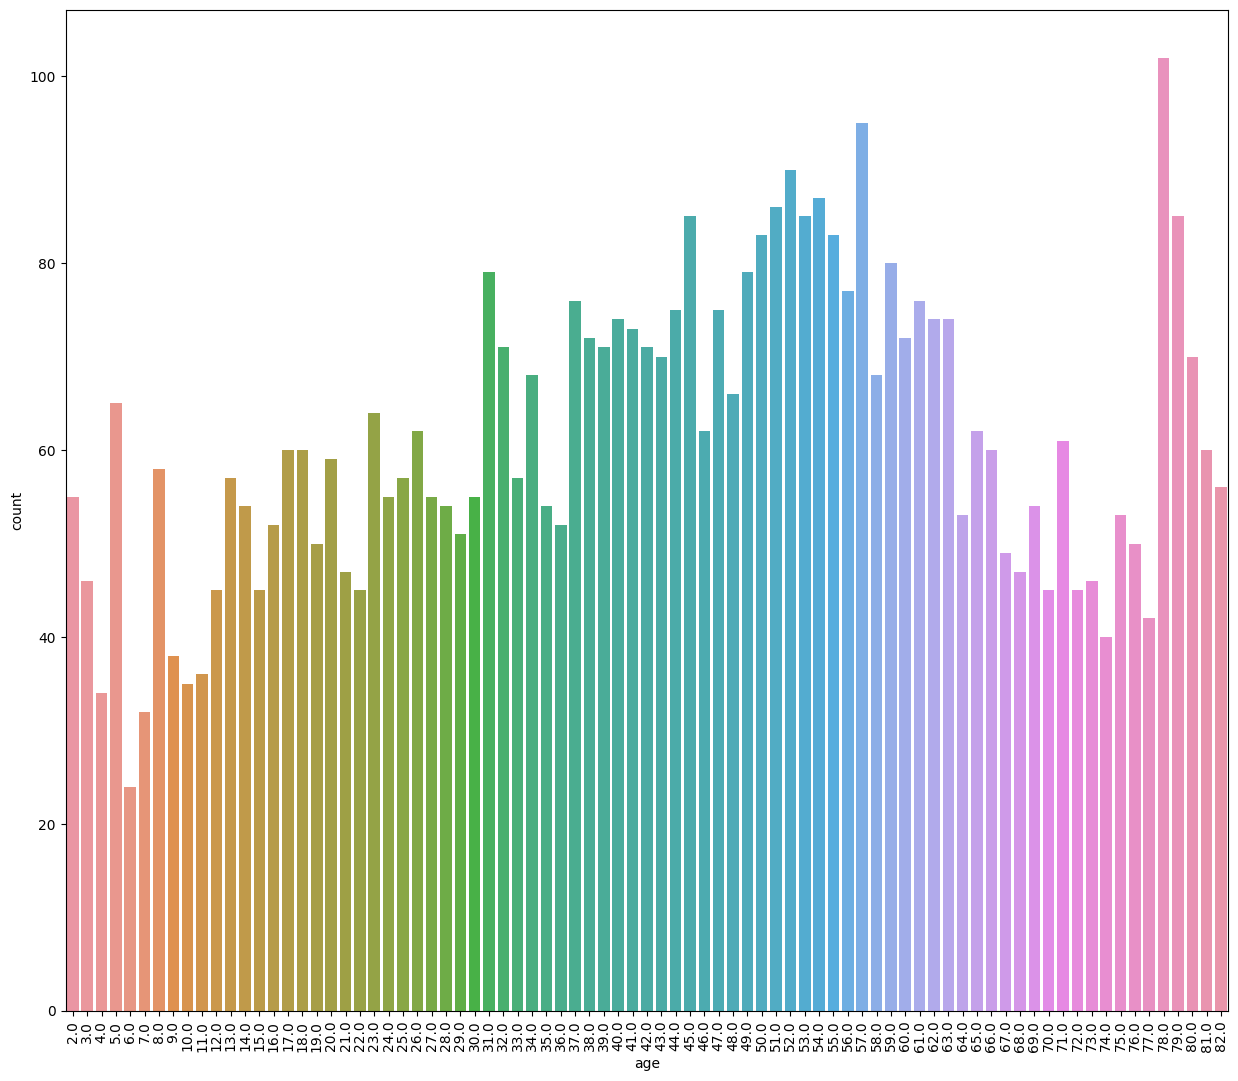

In [ ]:
#Figure sbows the Age and the total number of people with that age
plt.figure(figsize=(15,13))
my_plot = sns.countplot(x=df2['age'])

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

plt.show()

The Figure below entails the correlation in the form of heatmap for different variables in our dataset  against each other. This will help us understand how strongly differnent variables are correlated with each other.

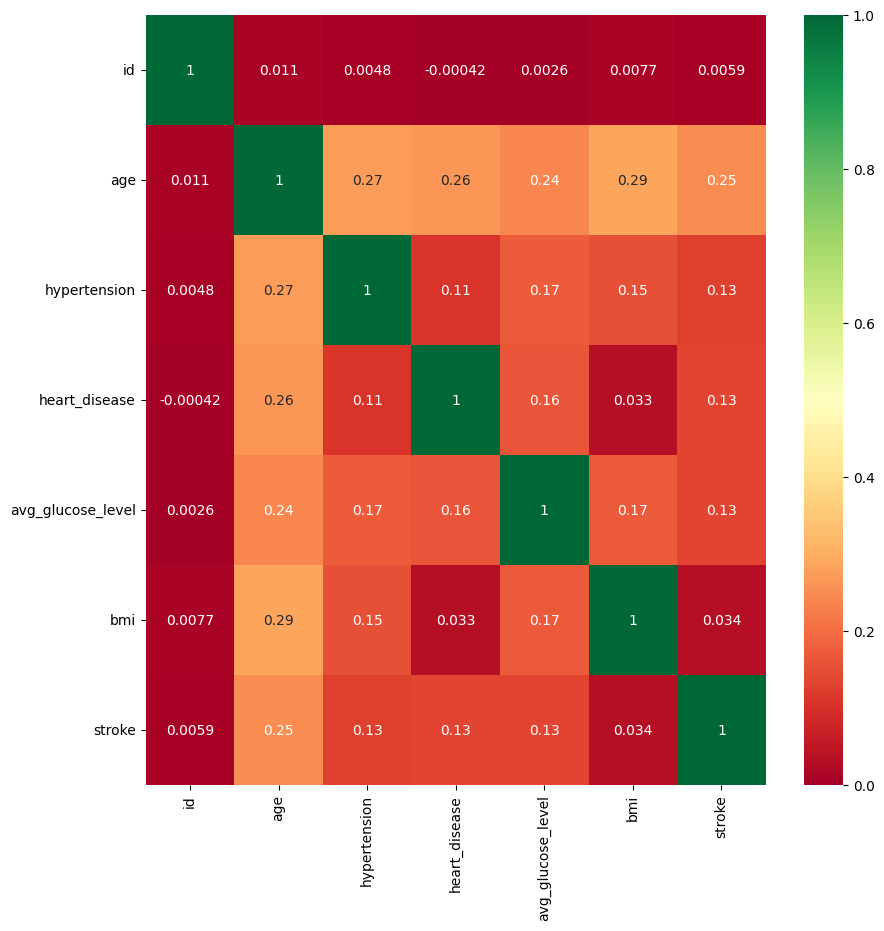

In [ ]:
#Correlation Grpah
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

To visulaize the values of different variables in our data we have drawn these histograms which show us the values stored in that variable.

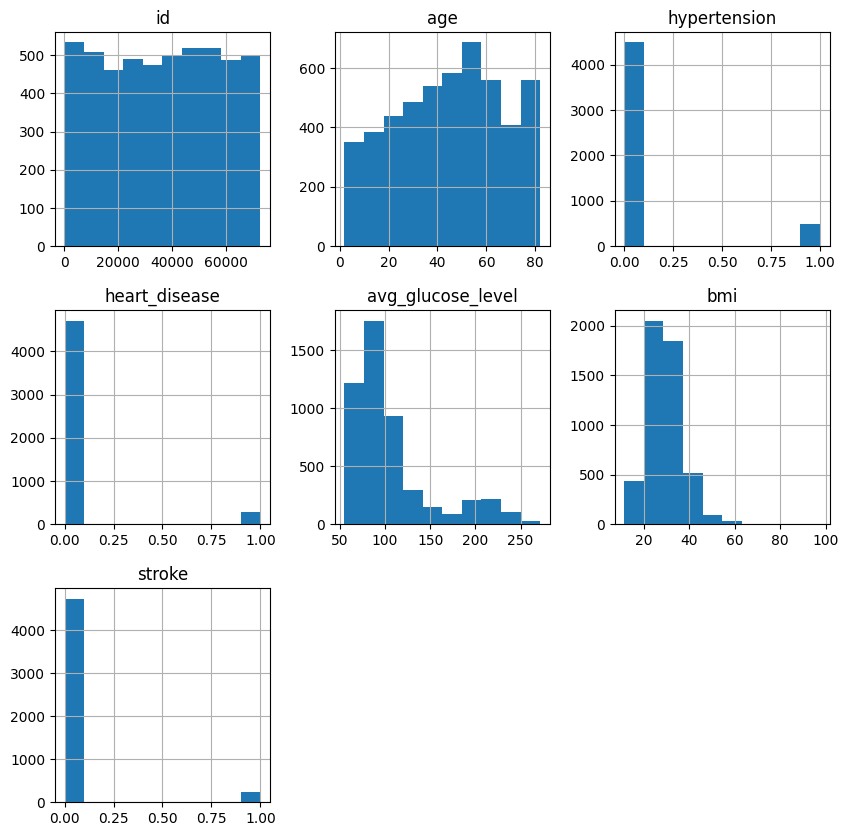

In [ ]:
#Histograms
df2.hist(figsize=(10,10))
plt.show()

The Follwoing graph shows the relationship between age and the frequency of the people with Heart Stock disease. The second graph shows the distribution across the glucose levels.


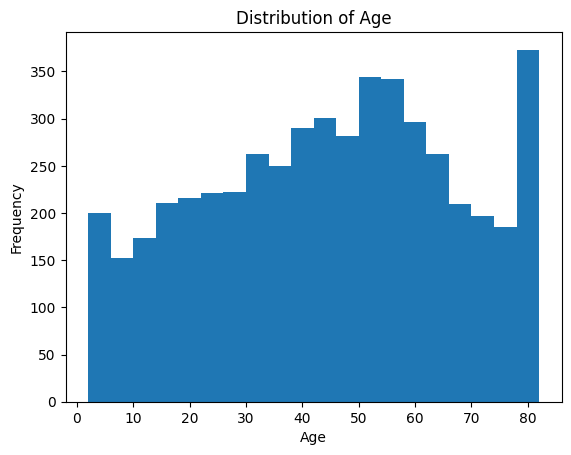

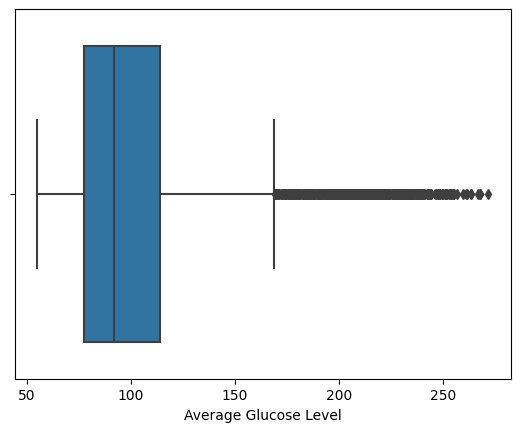

In [ ]:
#Histogram to show the distribution of age and the
plt.hist(df2['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#Distribution Graph of the Glucose Levels
sns.boxplot(x=df2['avg_glucose_level'])
plt.xlabel('Average Glucose Level')
plt.show()


Following graph shows us the Gender Distribution in the Dataset. Male and Female Columns show us the relative distribution of this variable.

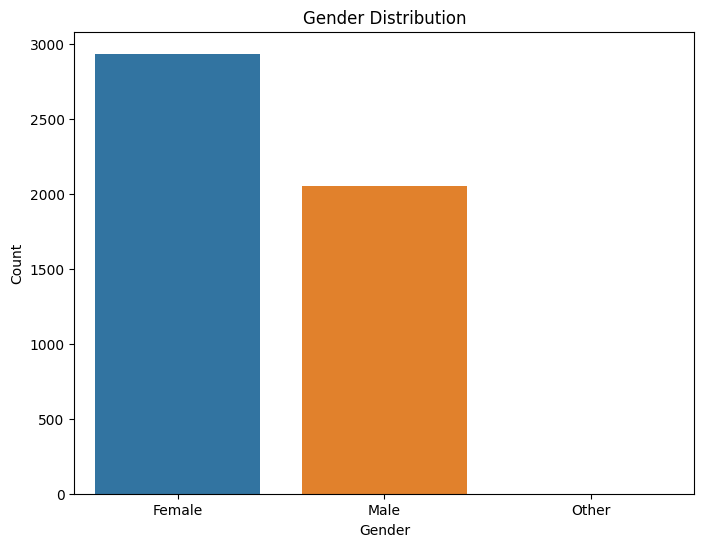

In [ ]:
#Barplot to show the Gender Distribution in the dataset
gender_counts = df2['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


Following Graph helps us visualize the proportion of smoking status in our data.

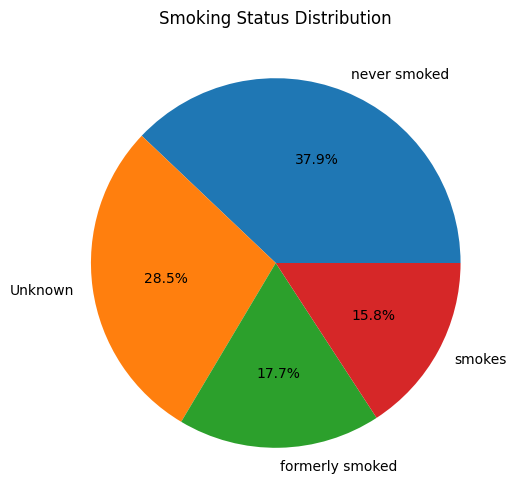

In [ ]:
#Piechart to visualize the Smoking and Non Smoking People in the Dataset
smoking_counts = df2['smoking_status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(smoking_counts.values, labels=smoking_counts.index, autopct='%1.1f%%')
plt.title('Smoking Status Distribution')
plt.show()

Folowing Grpah shows us the relaive distribution of BMI according to different genders

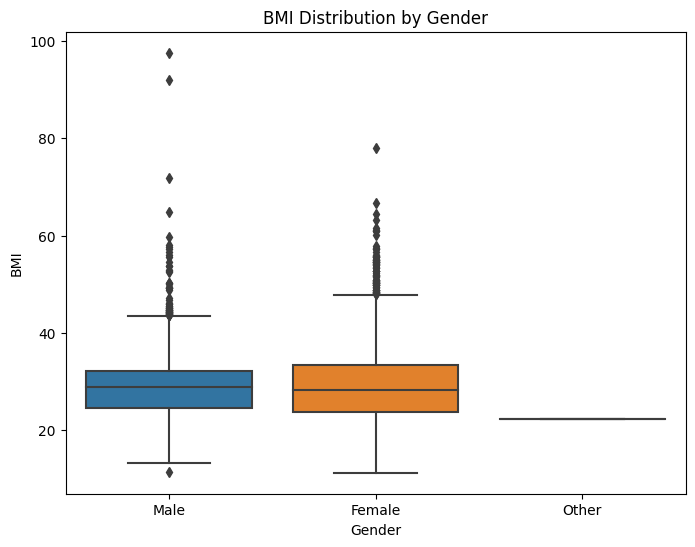

In [ ]:
#BMI Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['gender'], y=df2['bmi'])
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('BMI Distribution by Gender')
plt.show()

To finalize our machine learning model we need to see the trends between age and average glucose levele and how it changes with the the vlaue of heart stroke.

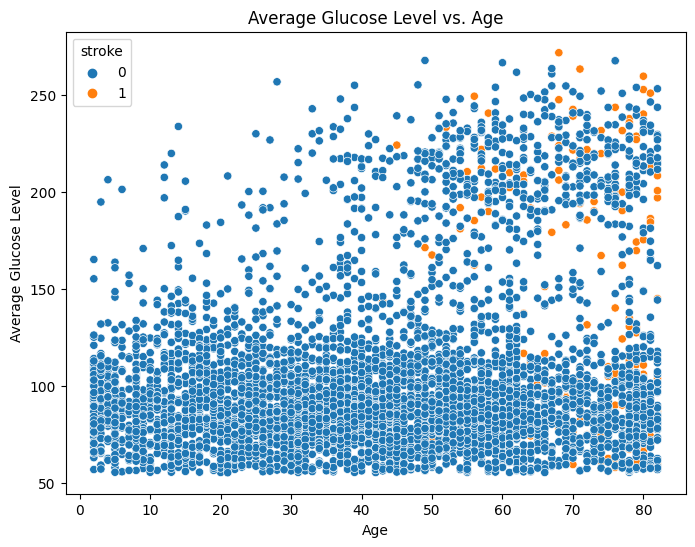

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['age'], y=df2['avg_glucose_level'], hue=df2['stroke'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level vs. Age')
plt.show()

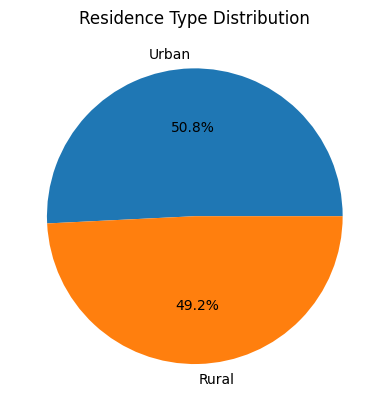

In [ ]:
#This graph visualizes the resdential information in our dataset
residence_counts = df2['Residence_type'].value_counts()
fig, ax = plt.subplots()
ax.pie(residence_counts.values, labels=residence_counts.index, autopct='%1.1f%%')
ax.set_title('Residence Type Distribution')

plt.show()


Now that we know the relative ratio of peopulation in rural and urban areas, the follwoing graph shows us the number of heart stroke in urban and rural areas.

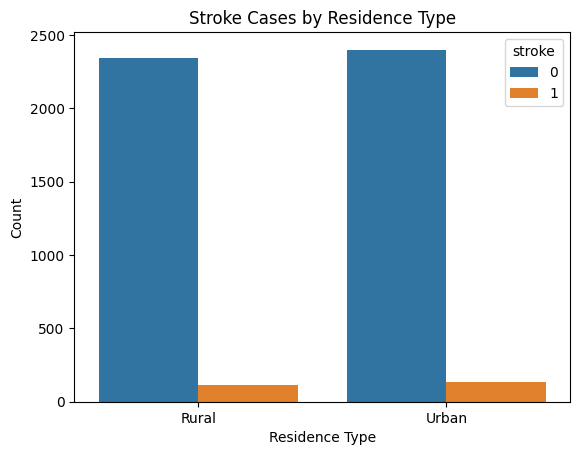

In [ ]:
stroke_by_residence = df2.groupby(['Residence_type', 'stroke']).size().reset_index(name='count')

fig, ax = plt.subplots()
sns.barplot(data=stroke_by_residence, x='Residence_type', y='count', hue='stroke')
ax.set_xlabel('Residence Type')
ax.set_ylabel('Count')
ax.set_title('Stroke Cases by Residence Type')

plt.show()


Following graph shows the distribution of BMI with respect to Genders

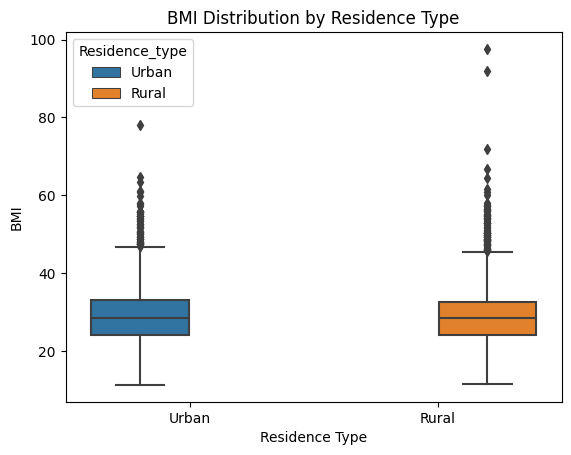

In [ ]:
#Boxplot to show the spreadness and skewdness in data
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='Residence_type', y='bmi', hue='Residence_type')
ax.set_xlabel('Residence Type')
ax.set_ylabel('BMI')
ax.set_title('BMI Distribution by Residence Type')

plt.show()


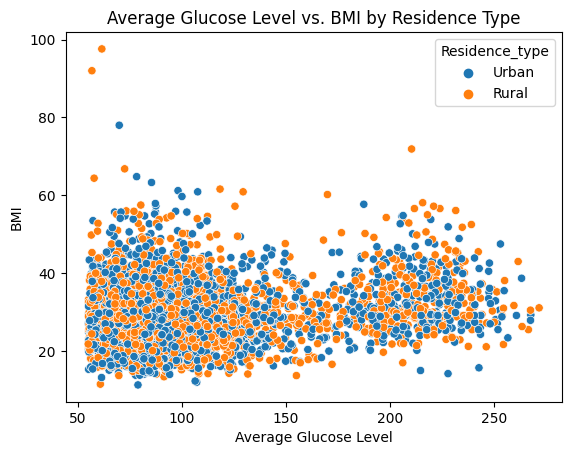

In [ ]:
#Scatterplot to show the average glucose level realive to different BMIs separated based on residential difference
fig, ax = plt.subplots()
sns.scatterplot(data=df2, x='avg_glucose_level', y='bmi', hue='Residence_type')
ax.set_xlabel('Average Glucose Level')
ax.set_ylabel('BMI')
ax.set_title('Average Glucose Level vs. BMI by Residence Type')

plt.show()


We have generated a following report to get a summary of the whole dataset. This gives a lot of insights about the mean, median , mode and some other valuable information

In [ ]:
#Generating pandas profile report summary statistics of given dataframe. It will be automatically download when code will run
pp.ProfileReport(df2)

profile = df2.profile_report(title='Pandas Profile Report')

profile.to_file("profile_report.html")

from google.colab import files
files.download("profile_report.html")


In [ ]:
#Correlation between the Four Main Variables of our data and ahow
correlation = df2[['age', 'avg_glucose_level', 'bmi', 'hypertension']].corr()
print(correlation)


                        age  avg_glucose_level       bmi  hypertension
age                1.000000           0.239802  0.287384      0.273684
avg_glucose_level  0.239802           1.000000  0.167923      0.173941
bmi                0.287384           0.167923  1.000000      0.154337
hypertension       0.273684           0.173941  0.154337      1.000000


In [ ]:
#Different statistics of data
mean_values = df2.mean()
count_values = df2.count()
median_values = df2.median()
std_values = df2.std()

print("Mean:")
print(mean_values)
print('\n')

print("Count:")
print(count_values)
print('\n')

print("Median:")
print(median_values)
print('\n')

print("Standard Deviation:")
print(std_values)
print('\n')

Mean:
id                   36439.888176
age                     44.239078
hypertension             0.099800
heart_disease            0.055311
avg_glucose_level      106.387912
bmi                     29.140822
stroke                   0.049699
dtype: float64


Count:
id                   4990
gender               4990
age                  4990
hypertension         4990
heart_disease        4990
ever_married         4990
work_type            4990
Residence_type       4990
avg_glucose_level    4990
bmi                  4990
smoking_status       4990
stroke               4990
dtype: int64


Median:
id                   36822.500
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.925
bmi                     28.600
stroke                   0.000
dtype: float64


Standard Deviation:
id                   21207.609911
age                     21.908078
hypertension             0.299763
heart_disease            0.228608
avg_glu

In [ ]:
mode_values = df2.mode().iloc[0]

print("Mode:")
print(mode_values)

Mode:
id                             67
gender                     Female
age                          78.0
hypertension                  0.0
heart_disease                 0.0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           93.88
bmi                         29.14
smoking_status       never smoked
stroke                        0.0
Name: 0, dtype: object


In [ ]:
#Count Values of the Variables used in the Data
gender_counts = df2['gender'].value_counts()
work_type_counts = df2['work_type'].value_counts()
smoking_status_counts = df2['smoking_status'].value_counts()

#Gender Count
print("Gender Counts:")
print(gender_counts)

#Worktype Count
print("\nWork Type Counts:")
print(work_type_counts)

#Smoking Status Count
print("\nSmoking Status Counts:")
print(smoking_status_counts)


Gender Counts:
Female    2937
Male      2052
Other        1
Name: gender, dtype: int64

Work Type Counts:
Private          2925
Self-employed     819
Govt_job          657
children          567
Never_worked       22
Name: work_type, dtype: int64

Smoking Status Counts:
never smoked       1892
Unknown            1424
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
#Sum of total Stroke Cases
stroke_sum = df2['stroke'].sum()
print("Total Stroke Cases:", stroke_sum)


Total Stroke Cases: 248


In [ ]:
#Average age of male and females in the group
average_age_by_gender = df2.groupby('gender')['age'].mean()
print(average_age_by_gender)


gender
Female    44.583248
Male      43.755361
Other     26.000000
Name: age, dtype: float64


In [ ]:
#Median value of BMI for People with different work types
median_bmi_by_work_type = df2.groupby('work_type')['bmi'].median()
print(median_bmi_by_work_type)


work_type
Govt_job         29.14
Never_worked     23.15
Private          29.14
Self-employed    29.14
children         19.10
Name: bmi, dtype: float64


In [ ]:
#Sum of stroke grouped according to their somking pattern
stroke_sum_by_smoking_status = df2.groupby('smoking_status')['stroke'].sum()
print(stroke_sum_by_smoking_status)


smoking_status
Unknown            46
formerly smoked    70
never smoked       90
smokes             42
Name: stroke, dtype: int64


In [ ]:
#Avergae Glucose level grouped according to the work type and the gender of the people
max_avg_glucose_by_gender_work_type = df2.groupby(['gender', 'work_type'])['avg_glucose_level'].max()
print(max_avg_glucose_by_gender_work_type)


gender  work_type    
Female  Govt_job         266.59
        Never_worked     148.37
        Private          267.76
        Self-employed    267.61
        children         219.81
Male    Govt_job         253.93
        Never_worked     161.28
        Private          271.74
        Self-employed    252.72
        children         213.87
Other   Private          143.33
Name: avg_glucose_level, dtype: float64


# **Shaping  and Cleaning the Data**

In [ ]:
#Counting number of the enteries in the Smoking Status Variable
df2['smoking_status'].value_counts()

#Changing the Categorical Varible "Smoking Status" to Numerical Varible
df2['smoking_status'].replace({
    'never smoked': 1,
    'Unknown': 2,
    'formerly smoked': 3,
    'smokes': 4
}, inplace=True)

#Changing the Categorical Varible "Residence Type" to Numerical Variable
df2['Residence_type'].replace({
    'Urban': 1,
    'Rural': 2
}, inplace=True)

#Changing the Categorical Varible "ever_married" to Numerical Variable
df2['ever_married'].replace({
    'Yes': 1,
    'No': 2
}, inplace=True)

#Changing the Categorical Varible "gender" to Numerical Variable
df2['gender'].replace({
    'Male': 1,
    'Female': 2,
    'Other': 3
}, inplace=True)

df2['work_type'].value_counts()

#Changing the Categorical Varible "work_type" to Numerical Variable
df2['work_type'].replace({
    'Private': 1,
    'Self-employed': 2,
    'children': 3,
    'Govt_job': 4,
    'Never_worked': 5
}, inplace=True)

df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.60,3,1
1,51676,2,61.0,0,0,1,2,2,202.21,29.14,1,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.50,1,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.40,4,1
4,1665,2,79.0,1,0,1,2,2,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,2,80.0,1,0,1,1,1,83.75,29.14,1,0
5106,44873,2,81.0,0,0,1,2,1,125.20,40.00,1,0
5107,19723,2,35.0,0,0,1,2,2,82.99,30.60,1,0
5108,37544,1,51.0,0,0,1,1,2,166.29,25.60,3,0


In [ ]:
#Some new insights based on the newly formed numerical varibales
value_counts = df2["stroke"].value_counts()
min_count = min(value_counts[0], value_counts[1])

#Since our Dataframe is not balanced we'll balance it first, before using it in the model
balanced_df = pd.concat([df2[df2["stroke"] == 0].sample(n=min_count, random_state=42), df2[df2["stroke"] == 1].sample(n=min_count, random_state=42)])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
#Balanced value of our target variable stroke
balanced_df["stroke"].value_counts()

1    248
0    248
Name: stroke, dtype: int64

In [ ]:
#Lets check the correlation matrix after splitting the data into equal division of stroke values 0 1

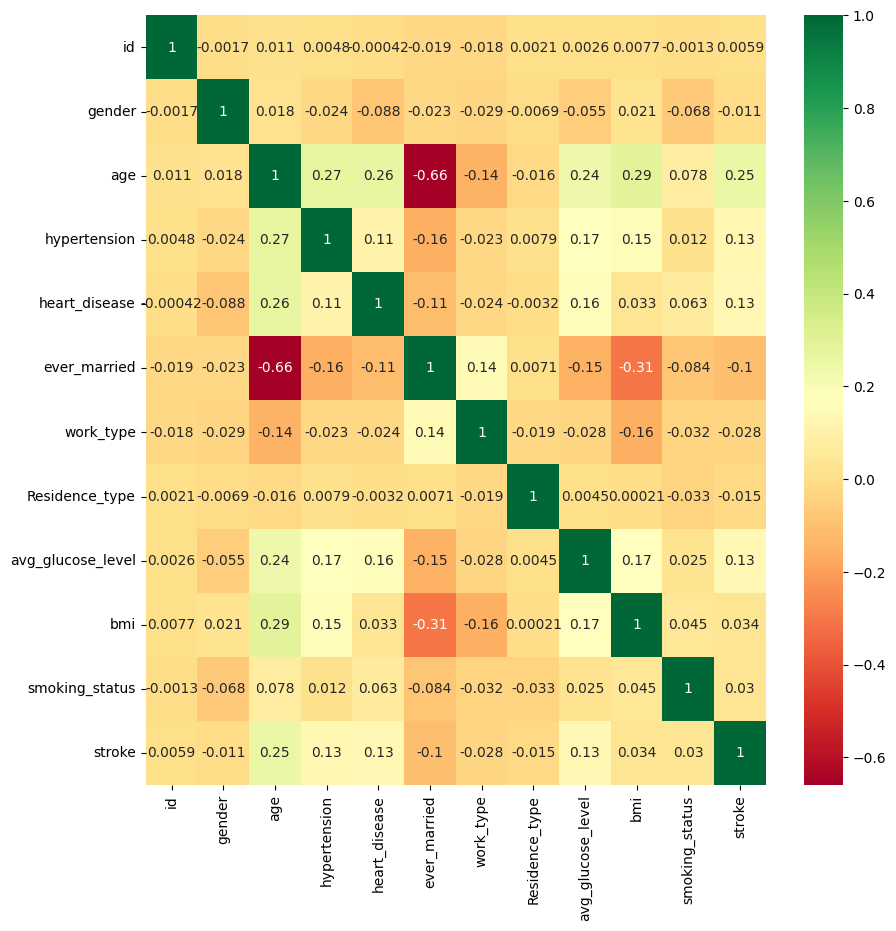

In [ ]:
corrmat = balanced_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [ ]:
#Following Relation shows the correlation between the "stroke", "bmi", "avg_glucose_level", "hypertension" and stroke
selected_columns = ["stroke", "bmi", "avg_glucose_level", "hypertension"]
selected_df = balanced_df[selected_columns]

correlation_matrix = selected_df.corr()
stroke_correlation = correlation_matrix["stroke"]

print(stroke_correlation)

stroke               1.000000
bmi                  0.137266
avg_glucose_level    0.262927
hypertension         0.264656
Name: stroke, dtype: float64





#**Comparing and Selecting Model**

In [ ]:
#Asiigning X and Y variables to our dataset
y = balanced_df['stroke']
X = balanced_df.drop(['stroke', 'id'], axis = 1)

In [ ]:
#Splitting the Data Set in such a way that Test Size is 20% and the training size is the 80% of Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size=0.20)

In [ ]:
#Standarizing our Dataset using Scaler Standard
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

confusion matrix
[[57  0]
 [ 1 42]] 

Accuracy of RFC: 99.0 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.98      1.00      0.99        42

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



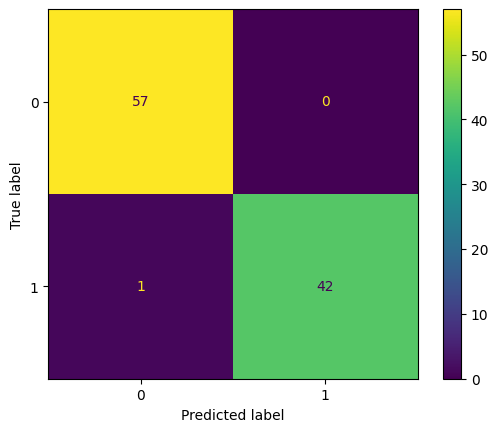

In [ ]:
#Implementing the Random Forest Classifier to our Splitted Scaler Dataset
randomforest_classifier= RandomForestClassifier(n_estimators=10)

#Cross-Validation Score
score = cross_val_score(randomforest_classifier, X, y, cv=10)

randomforest_classifier.fit(X, y)
rf_predicted=randomforest_classifier.predict(x_test)

#Confusion Matrix
cm = confusion_matrix(rf_predicted,y_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confusion matrix")
print(cm, "\n")

print("Accuracy of RFC:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

d = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=randomforest_classifier.classes_)
rf_acc_score = accuracy_score(y_test, rf_predicted)

d.plot()
plt.show()

confusion matrix
[[36 22]
 [ 4 38]] 

Accuracy of LR: 74.0 

              precision    recall  f1-score   support

           0       0.90      0.62      0.73        58
           1       0.63      0.90      0.75        42

    accuracy                           0.74       100
   macro avg       0.77      0.76      0.74       100
weighted avg       0.79      0.74      0.74       100



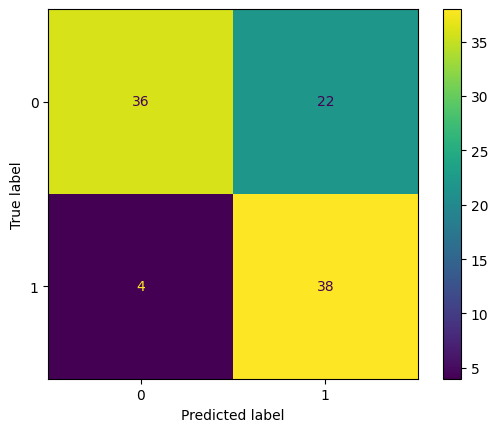

In [ ]:
#Implementing Logistic Regression to our dataset
logr = LogisticRegression()
model = logr.fit(X_train, y_train)
lr_predict = logr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confusion matrix")
print(lr_conf_matrix, "\n")

print("Accuracy of LR:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

d = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix, display_labels=logr.classes_)
d.plot()
plt.show()

confusion matrix
[[39 19]
 [ 6 36]] 

Accuracy of NB: 75.0 

              precision    recall  f1-score   support

           0       0.87      0.67      0.76        58
           1       0.65      0.86      0.74        42

    accuracy                           0.75       100
   macro avg       0.76      0.76      0.75       100
weighted avg       0.78      0.75      0.75       100



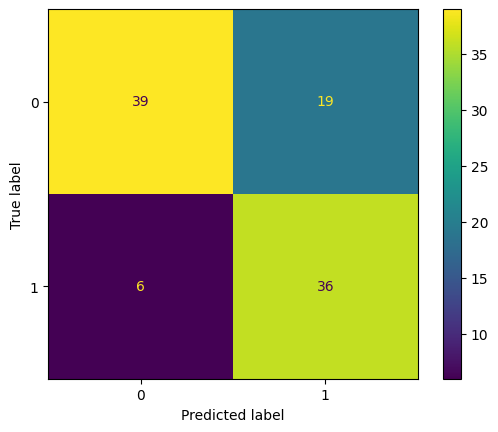

In [ ]:
#Impleemting the Gaussian Framework on our Dataset
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

#Printing Confusion Matrix
print("confusion matrix")
print(nb_conf_matrix, "\n")
print("Accuracy of NB:",nb_acc_score*100,'\n')

print(classification_report(y_test,nbpred))
d = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix, display_labels=randomforest_classifier.classes_)
d.plot()
plt.show()

Confusion Matrix:
[[31 27]
 [ 4 38]] 

Accuracy of XGBoost: 69.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        58
           1       0.58      0.90      0.71        42

    accuracy                           0.69       100
   macro avg       0.74      0.72      0.69       100
weighted avg       0.76      0.69      0.68       100



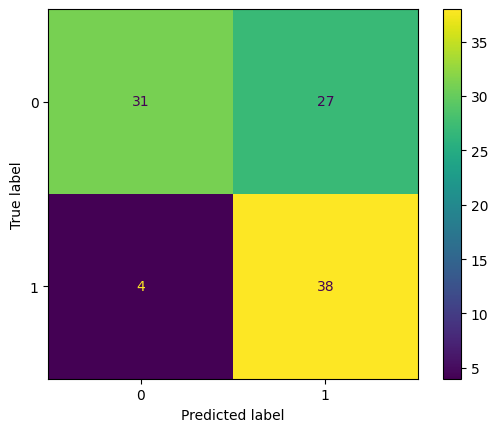

In [ ]:
# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52,
                               colsample_bytree=0.6, seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6,
                               colsample_bynode=0.5)
xgb_classifier.fit(X_train, y_train)

# Make predictions using the trained classifier
xgb_predictions = xgb_classifier.predict(X_test)

# Calculate the confusion matrix and accuracy score
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(xgb_confusion_matrix, "\n")

print("Accuracy of XGBoost:", xgb_accuracy * 100, '\n')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Plot the confusion matrix
xgb_display = ConfusionMatrixDisplay(confusion_matrix=xgb_confusion_matrix, display_labels=xgb_classifier.classes_)
xgb_display.plot()
plt.show()


confusion matrix
[[36 22]
 [ 7 35]] 

Accuracy of KNN: 71.0 

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        58
           1       0.61      0.83      0.71        42

    accuracy                           0.71       100
   macro avg       0.73      0.73      0.71       100
weighted avg       0.74      0.71      0.71       100



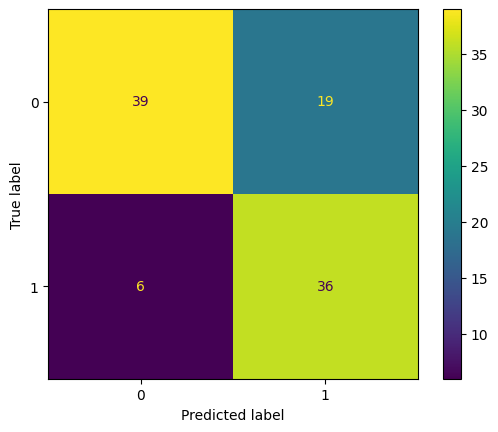

In [ ]:
#Implementaion of the knn Algorithm on our dataset
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confusion matrix")
print(knn_conf_matrix, "\n")
print("Accuracy of KNN:",knn_acc_score*100,'\n')

print(classification_report(y_test,knn_predicted))

d = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix, display_labels=knn.classes_)
d.plot()
plt.show()

Confusion Matrix:
[[38 20]
 [12 30]] 

Accuracy of Decision Tree Classifier: 68.0 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        58
           1       0.60      0.71      0.65        42

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



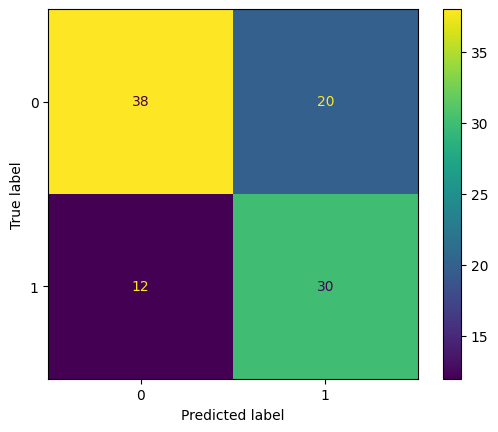

In [ ]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=50, max_depth=10)
dt_classifier.fit(X_train, y_train)

# Make predictions using the trained classifier
dt_predictions = dt_classifier.predict(X_test)

# Calculate the confusion matrix and accuracy score
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(dt_confusion_matrix, "\n")

print("Accuracy of Decision Tree Classifier:", dt_accuracy * 100, '\n')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Plot the confusion matrix
dt_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=dt_classifier.classes_)
dt_display.plot()
plt.show()


confusion matrix
[[38 20]
 [ 4 38]] 

Accuracy of SVC: 76.0 

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        58
           1       0.66      0.90      0.76        42

    accuracy                           0.76       100
   macro avg       0.78      0.78      0.76       100
weighted avg       0.80      0.76      0.76       100



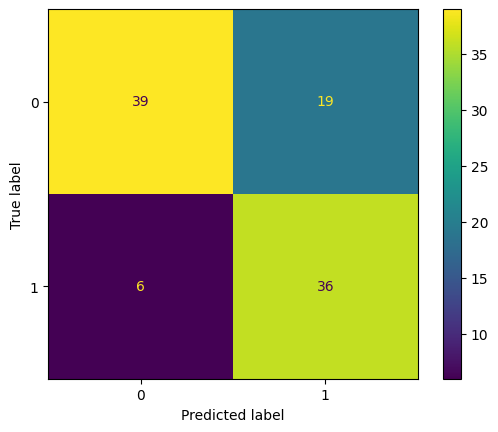

In [ ]:
#Implementaion of the SVC Algorithm
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

#Confusion Matrix, Accuracy, Score and Percision
print("confusion matrix")
print(svc_conf_matrix, "\n")
print("Accuracy of SVC:",svc_acc_score*100,'\n')

print(classification_report(y_test,svc_predicted))

d = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix, display_labels=svc.classes_)
d.plot()
plt.show()

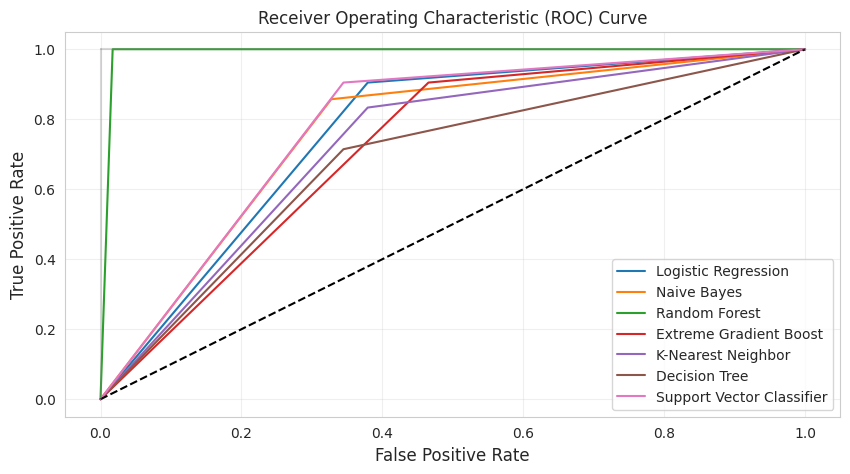

In [ ]:
#Plotting the ROC Curve of each model to find the efficient one
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Logistic Regression
lr_fp_rate, lr_tp_rate, lr_threshold = roc_curve(y_test, lr_predict)
plt.plot(lr_fp_rate, lr_tp_rate, label='Logistic Regression')

# Naive Bayes
nb_fp_rate, nb_tp_rate, nb_threshold = roc_curve(y_test, nbpred)
plt.plot(nb_fp_rate, nb_tp_rate, label='Naive Bayes')

# Random Forest
rf_fp_rate, rf_tp_rate, rf_threshold = roc_curve(y_test, rf_predicted)
plt.plot(rf_fp_rate, rf_tp_rate, label='Random Forest')

# Extreme Gradient Boost
xgb_fp_rate, xgb_tp_rate, xgb_threshold = roc_curve(y_test, xgb_predictions)
plt.plot(xgb_fp_rate, xgb_tp_rate, label='Extreme Gradient Boost')

# K-Nearest Neighbor
knn_fp_rate, knn_tp_rate, knn_threshold = roc_curve(y_test, knn_predicted)
plt.plot(knn_fp_rate, knn_tp_rate, label='K-Nearest Neighbor')

# Decision Tree
dt_fp_rate, dt_tp_rate, dt_threshold = roc_curve(y_test, dt_predictions)
plt.plot(dt_fp_rate, dt_tp_rate, label='Decision Tree')

# Support Vector Classifier
svc_fp_rate, svc_tp_rate, svc_threshold = roc_curve(y_test, svc_predicted)
plt.plot(svc_fp_rate, svc_tp_rate, label='Support Vector Classifier')

plt.plot([0, 1], ls='--', color='black')
plt.plot([0, 0], [1, 0], c='.5', alpha=0.3)
plt.plot([1, 1], c='.5', alpha=0.3)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.show()


In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Extreme Gradient Boost',
               'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine']

accuracy_scores = [lr_acc_score * 100, nb_acc_score * 100, rf_acc_score * 100, xgb_accuracy * 100,
                   knn_acc_score * 100, dt_accuracy * 100, svc_acc_score * 100]

recall_scores = [classification_report(y_test, lr_predict, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, nbpred, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, rf_predicted, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, xgb_predictions, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, knn_predicted, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, dt_predictions, output_dict=True)['weighted avg']['recall'],
                 classification_report(y_test, svc_predicted, output_dict=True)['weighted avg']['recall']]

precision_scores = [classification_report(y_test, lr_predict, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, nbpred, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, rf_predicted, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, xgb_predictions, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, knn_predicted, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, dt_predictions, output_dict=True)['weighted avg']['precision'],
                    classification_report(y_test, svc_predicted, output_dict=True)['weighted avg']['precision']]

model_evaluation = pd.DataFrame({'Model': model_names,
                                 'Accuracy': accuracy_scores,
                                 'Recall': recall_scores,
                                 'Precision': precision_scores})

model_evaluation

,Model,Accuracy,Recall,Precision
0,Logistic Regression,74.0,0.74,0.788000
1,Naive Bayes,75.0,0.75,0.777576
2,Random Forest,99.0,0.99,0.990233
3,Extreme Gradient Boost,69.0,0.69,0.759253
4,K-Nearest Neighbour,71.0,0.71,0.743476
5,Decision Tree,68.0,0.68,0.692800
6,Support Vector Machine,76.0,0.76,0.799934


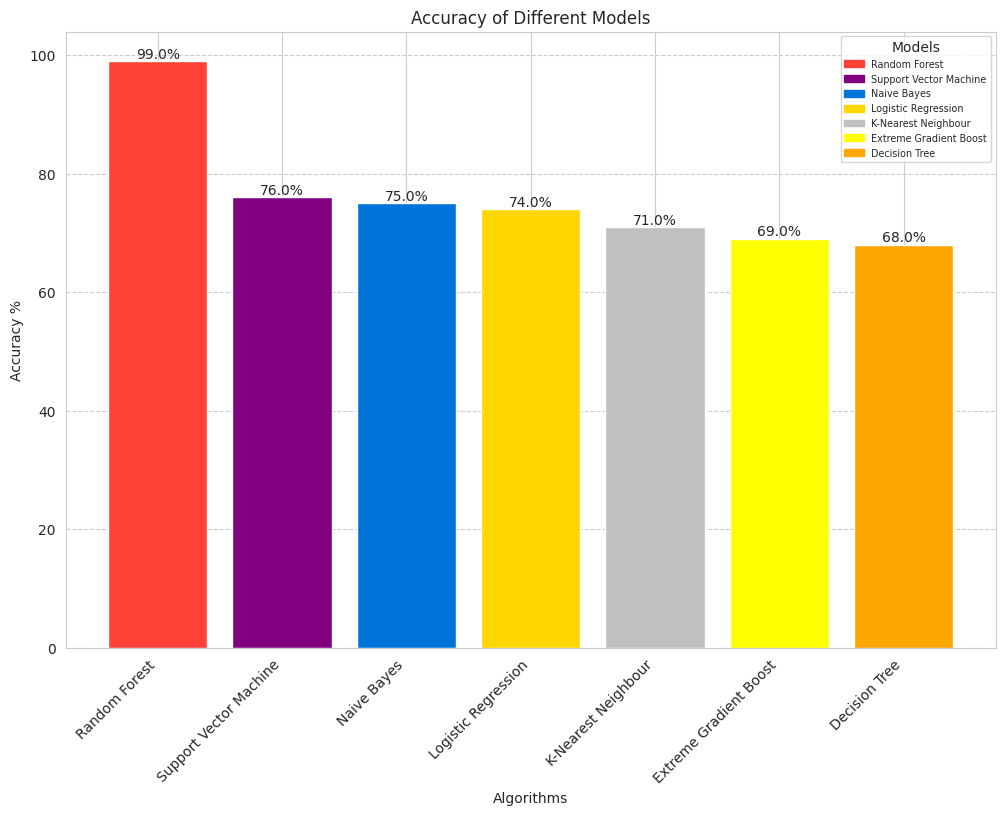

In [ ]:
#Visualization of accuracy of different implemented models
import numpy as np
import matplotlib.pyplot as plt

colors = ['#FF4136', '#800080', '#0074D9', '#FFD700', '#C0C0C0', '#FFFF00', '#FFA500']
plt.figure(figsize=(12, 8))
plt.grid(axis='y', linestyle='--')

sorted_indices = np.argsort(model_evaluation['Accuracy'])[::-1]
sorted_models = np.array(model_evaluation['Model'])[sorted_indices]
sorted_accuracies = np.array(model_evaluation['Accuracy'])[sorted_indices]

bars = plt.bar(sorted_models, sorted_accuracies, color=colors)
plt.title("Accuracy of Different Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f}%', ha='center', va='bottom')

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, sorted_models, title='Models', loc='best', fontsize='x-small')



plt.show()


In [ ]:
#Choosing Random Forest Model as its ROC curve is closer to best-fit classifer line which can be seen in the previous graphs and it is fullfilling our objective
#of nearly zero FN.

print('Predicted values of test dataset using Random Forest Classifier are as follow: ')
print (rf_predicted)

Predicted values of test dataset using Random Forest Classifier are as follow: 
[0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0]


# **Work Cited**

**Dataset:**

Fedesoriano. “Stroke Prediction Dataset.” Kaggle, 26 Jan. 2021, www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

**Literature Review:**

Dritsas, Elias, and Maria Trigka. “Stroke Risk Prediction with Machine Learning Techniques.” MDPI, 21 June 2022, www.mdpi.com/1424-8220/22/13/4670.

Chantamit-o-pas, Pattanapong, and Madhu Goyal. Prediction of Stroke Using Deep Learning Model - Springer, www.link.springer.com/content/pdf/10.1007/978-3-319-70139-4_78.pdf. Accessed 20 June 2023.

Emon, Minhaz Uddin, et al. “Performance Analysis of Machine Learning Approaches in Stroke Prediction.” Tampere University Research Portal, 1 Jan. 1970, www.researchportal.tuni.fi/en/publications/performance-analysis-of-machine-learning-approaches-in-stroke-pre.

Gavhane, A., et al. “[PDF] Prediction of Heart Disease Using Machine Learning: Semantic Scholar.” 2018 Second International Conference on Electronics, Communication and Aerospace Technology (ICECA), 1 Jan. 1970, www.semanticscholar.org/paper
Prediction-of-Heart-Disease-Using-Machine-Learning-Gavhane-Kokkula/828d61fd204bebf70a506ecc0720e4287bec4fd0.

**Model Ideas:**

Nareshbhat. “Heart Attack Prediction Using Different ML Models.” Kaggle, 8 Mar. 2021, www.kaggle.com/code/nareshbhat/heart-attack-prediction-using-different-ml-models.

Shivanshdwivedi. “Heart Disease Prediction Using Machine Learning.” Kaggle, 11 June 2020, www.kaggle.com/code/shivanshdwivedi/heart-disease-prediction-using-machine-learning.



**End of Report**





